

# 1. Introduction & Data Analysis

## 1.1. Introduction

Welcome to the Tutorial on Deep Learning for Human Activity Recognition. This is the first of five notebooks, which you we will work through together to get a basic understanding of all the necessary steps one needs to go through when applying Deep Learning on Human Activity Recognition.

We assume that you already listened to the introduction, are familiar with the ultimate goal of the tutorial as well as necessary terms in order to understand this tutorial. You can look up the introduction slides on the website of the tutorial (https://mariusbock.github.io/dl-for-har/).

During this tutorial we will cover the Deep Learning Activity Recognition Chain (**DL-ARC**) pipeline, which is a reworked version of the Activity Recognition Chain as proposed by Bulling et al. in 2014. As part of familiarising you with the DL-ARC, within the next hours we will cover the following topics:
- Data Collection & Analysis
- Data Preprocessing
- Evaluation
- Training
- Validation & Testing

We will work with a mix of presentation slides and Juypter Notebooks. Before jumping into the contents of the pipeline, we will briefly cover the basics of how to use Jupyter Notebooks and, if used, Google Colab.

### 1.1.1. For Colab Users

If you are accessing this tutorial via Google Colab, we advice you to change the language of your Google Colab to be in English, rather than another language. This will help us to better assist you with issues that might arise during the tutorial. There are two ways to change the language:
1. On Google Colab, go to 'Help' -> 'View in English'. 
2. Change the default language of your browser to English.



In general, we strongly advice you to use Google Colab as it provides you with a working Python distribution as well as free GPU resources. To make Colab use GPUs you need to change the current notebooks runtime type via:

- Runtime -> Change runtime type -> Dropdown -> GPU -> Save

For the live tutorial, we require all participants to use Colab. If you decide to rerun the tutorial at later points and rather want to have it run locally, feel free to clone our GitHub repository (mariusbock/dl-for-har). 

This notebook will teach you how to analyse a Human Activity Recognition dataset. It will show you sample methods which one can apply to get a feel for the data and use case at hand.

### 1.1.2. Jupyter Notebooks Basics

Jupyter notebooks are made of two main components. Markdown text cells and code cells. The latter can be seen as small Python scripts, which can be individually run. The output of the code is printed right after the cell. This allows for more granualar and expressive code with explanations and intermediate outputs along the way. In the following you will find a sample code cell. You can run the cell by either clicking the 'run' symbol in the top left of the cell or by clicking on it and hitting Shift + Enter on your keyboard. You can also rerun cells as many times as you want, but be aware that some cells require other cells to be run beforehand in order to work properly (e.g. if one cell references variables defined in another cell)

**Note**: If you get a warning saying "Warning: This notebook was not authored by Google.", just hit "Run anyway".

In [1]:
# This is a normal print statement
print('Hello World!')

Hello World!


In [2]:
# Just like any script you can declare variables and import packages
import numpy as np

test_array = np.array([1, 2, 3, 4, 5])
print(test_array)

# You can also just write the variable again and it will be printed as output of the cell
test_array

[1 2 3 4 5]


array([1, 2, 3, 4, 5])

## 1.1. The Dataset

Throughout the whole tutorial we will use the **RealWorld HAR dataset**. The dataset comprises of 15 subjects perfoming a set of 8 activites (climbing stairs up and down, jumping, lying, running/ jogging, sitting, standing, walking). The orginal dataset covers acceleration, GPS, gyroscope, light, magnetic field, and sound level data. Sensors were placed on multiple body positions, i.e. chest, forearm, head, shin, thigh, upper arm, and waist. Each subject performed each activity roughly 10 minutes except for jumping (~1.7 minutes).

For simplicity and runtime purposes we will only data obtained from the first three subjects and only use acceleration data captured from the wrist. Within the first task of this notebook, we will show you how to load the dataset using pandas and print the first five rows of the dataset.

Before running any further code within this notebook, you need to run the code cell below. Please set use_colab to be True if you are accessing this notebook via Colab. If not, please set it to False. This code cell will make sure that imports from our GitHub repository will work.

In [3]:
import os
import sys

use_colab = True

module_path = os.path.abspath(os.path.join('..'))

if use_colab:
    # clone package repository
    !git clone https://github.com/mariusbock/dl-for-har.git

    # navigate to dl-for-har directory
    %cd dl-for-har/
else:
    os.chdir(module_path)
    
# this statement is needed so that we can use the methods of the DL-ARC pipeline
if module_path not in sys.path:
    sys.path.append(module_path)

Cloning into 'dl-for-har'...
remote: Enumerating objects: 518, done.
remote: Counting objects: 100% (518/518), done.
remote: Compressing objects: 100% (424/424), done.
remote: Total 518 (delta 168), reused 406 (delta 86), pack-reused 0
Receiving objects: 100% (518/518), 22.05 MiB | 15.03 MiB/s, done.
Resolving deltas: 100% (168/168), done.
/content/dl-for-har


### Task 1: Loading the dataset

1. Load the dataset containing the data of the first three subjects within the RWHAR dataset. The dataset is called 'rwhar_3sbjs_data.csv' and is within the 'data' folder of the repository. To load the dataset use pandas read_csv() method. 
2. While reading in the data, use the names attribute to pass along the header of the CSV file. The columns we will be using are 'subject_id', 'acc_x', 'acc_y', 'acc_z' and 'activity_label'.
3. Print the first five rows of the loaded dataset using the built-in head() method of the pandas dataframe.

In [5]:
# this statement will import pandas for you
import pandas as pd

# declare where the dataset lies
data_dir = 'data/rwhar_3sbjs_data.csv'

# use pd.read_csv() to load the dataset; use the names attribute to pass along the column names
data = pd.read_csv(data_dir, names=['subject_id', 'acc_x', 'acc_y', 'acc_z', 'activity_label'])

# print the first 5 rows of the loaded data using .head()
data.head()

,subject_id,acc_x,acc_y,acc_z,activity_label
0,0,0.378284,10.168175,0.847547,climbing_up
1,0,0.383671,10.172364,0.849942,climbing_up
2,0,0.372298,10.181941,0.859518,climbing_up
3,0,0.342969,10.170568,0.834379,climbing_up
4,0,0.319626,10.159795,0.818817,climbing_up


As you can see, the dataset comprises of 5 columns.
- **subject_id**: identifier which subject the data belongs to
- **acc_x**: acceleration data obtained from the wrist (x-axis)
- **acc_y**: acceleration data obtained from the wrist (y-axis)
- **acc_z**: acceleration data obtained from the wrist (z-axis)
- **activity_label**: name of the activtiy which was performed

## 1.2. Visualizing the Dataset

Now that you have loaded the dataset, we will take a closer look at the at it. In the following, we will go over sample steps you can take to get a better feeling for a dataset and how its data looks like.


First, we will have a look at the labeling of the dataset. Each record represents a recorded value of the sensor worn by the participants on their wrist. The corresponding label is the activity they were performing at the given point in time. The next code cell will introduce to you built-in functions of pandas you can use to quickly see how the labels are distributed across all records.

### Task 2: Analyse the labeling
1. Analyse the label distribution of the dataset. What unique labels exist in the dataset? How many instances of each label are there?
2. (Advanced) Visualize your results obtained in 1. using a bar plot diagram.


Unique labels in the dataset:
climbing_up
standing
walking
sitting
running
climbing_down
jumping
lying

Label Distribution: 
sitting          32833
standing         31924
walking          31793
lying            31229
running          30429
climbing_up      26938
climbing_down    25281
jumping           4232
Name: activity_label, dtype: int64


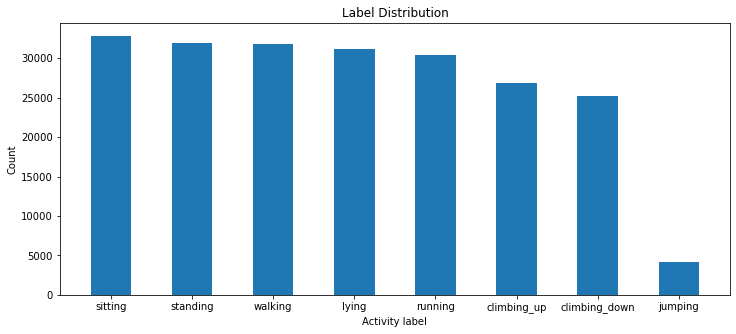

In [ ]:
# imports needed for this code cell
import numpy as np
import matplotlib.pyplot as plt

# obtain the unique labels within the 'activity_label' column
# Hint: select the column and call .unique()
unique_labels = data['activity_label'].unique()
# If you did everything corectly the 8 activities mentioned in the beginning of this notebook should be printed
print('\nUnique labels in the dataset:')
for l in unique_labels: print(l)

# obtain the label distribution of the 'actitiy_label' column
# Hint: select the column and call .value_counts()
label_distribution = data['activity_label'].value_counts()
# this should print all the labels as well as how many times they occured in the dataset
print('\nLabel Distribution: ')
print(label_distribution)

# declare the x- and y-axis of the plot
# x_axis = the different labels within the dataset
# y_axis = their occurences across the dataset
x_axis = label_distribution.index.tolist()
y_axis = label_distribution.tolist()
# this will declare the plot
plt.figure(figsize=(12, 5))
plt.bar(x_axis, y_axis, width=0.5)
plt.xlabel('Activity label')
plt.ylabel('Count')
plt.title('Label Distribution')
plt.show()

Now lets focus on actually visualizing the acceleration data. As you saw in the introduction to this tutorial, even though sensor data is more abstract than e.g. images, we can still visualize it along the time axis as a simple graph. Within the next coding task, you will define a sample function called 'plot_activity' which will be able to plot data belonging to sample activities as a simple graph and see how they already look different from each other.

### Task 3: Plot activity data


1. Filter the original dataset to only contain records with the wanted label 
2. Define the y-axis of the plot as the sensor values, e.g. acceleration data on the x-, y- and z-axis
3. Define the x-axis of the plot as the time in seconds (Hint: you need the sampling rate).
4. Test the function for different activity labels and sensors.

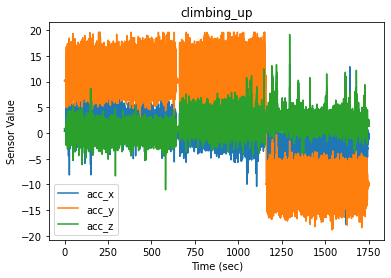

In [20]:
%matplotlib inline
import math
import matplotlib.pyplot as plt

# define the activity name, sensor names and sampling rate. 
# Hint: you can get all these information by scrolling up and reading through what you already did
activity_label = 'climbing_up'
sensor_names = ['acc_x', 'acc_y', 'acc_z']
sampling_rate = 50

def plot_activity(data, label, sensor_names, sampling_rate):
    # filter the data to only contain data from the activtiy_label
    filtered_data = data[data.activity_label==label]
    
    # define the y- and x-axis as defined above
    # Hint for x-axis: count how many records there are and divide it by the sampling rate
    y_axis = filtered_data[sensor_names]
    x_axis = np.array(range(len(filtered_data))) / sampling_rate

    # this will plot your data
    plt.plot(x_axis, y_axis)

    plt.xlabel('Time (sec)')
    plt.ylabel('Sensor Value')
    plt.title(label)
    plt.legend(['acc_x', 'acc_y', 'acc_z'])
    plt.show()

# call the function you just defined using the correct inputs
plot_activity(data, activity_label, sensor_names, sampling_rate)

Now, this plot may look a bit messy to you. There are many interactive plots which you can use. In the following, we implemented one for you, so you can play around with the plot you just created and zoom in on certain parts. Just run the two code cells below.

In [28]:

def plot_activity_advanced(data, label, sensor_names, sampling_rate):
  # needs to be implemented

plot_activity_advanced(data, activity_label, sensor_names, sampling_rate)

ValueError: ignored

## 1.3. More detailled analysis

Lastly we want to introduce to you a more complex analysis of the dataset. As you will learn within the next notebook, we need to segment our data using a sliding window approach. The size of the windows is often times a crucial parameter which you need to decide upon before training your network. Sometimes smaller windows are required due to activities changing fast. Smaller windows will also give you essentially more data, as you are chunking the data into smaller pieces. On the other hand, small windows can lead to your network not recognizing characteristical traits within the data and thus hurt the expressiveness of your data.

We therefore implemented a function within our GitHub, which allows you to get a summary of the activities in your dataset. For each subject as well as overall the function gives you:
1. A list of all the activities that happended and how long they lasted
2. The average, maximum and minimum time each activity lasted

This can help you better understand your use case at hand and decide on how large or small your sliding windows should be.

### Task 4: Analyze the activities

1. Run the code cell below.
2. Analyze the results. What do you notice? Do the activities change frequently?
3. Do the results differ a lot across subjects?

In [29]:
from data_processing.data_analysis import analyze_window_lengths

analyze_window_lengths(labels=data['activity_label'], subject_idx=data['subject_id'], sampling_rate=50)


#### ACTIVITY TIMES ####

#### SUBJECT 0 #####
Label climbing_up:  Duration: 657.42 Datapoints: 0 - 32871
Label standing:  Duration: 642.38 Datapoints: 32872 - 64991
Label walking:  Duration: 638.98 Datapoints: 64992 - 96941
Label sitting:  Duration: 657.54 Datapoints: 96942 - 129819
Label running:  Duration: 612.24 Datapoints: 129820 - 160432
Label climbing_down:  Duration: 508.7 Datapoints: 160433 - 185868
Label jumping:  Duration: 86.76 Datapoints: 185869 - 190207
Label lying:  Duration: 628.4 Datapoints: 190208 - 221628

#### SUBJECT 1 #####
Label climbing_up:  Duration: 503.0 Datapoints: 0 - 25150
Label standing:  Duration: 615.36 Datapoints: 25151 - 55919
Label walking:  Duration: 614.88 Datapoints: 55920 - 86664
Label running:  Duration: 613.1 Datapoints: 86665 - 117320
Label climbing_down:  Duration: 496.52 Datapoints: 117321 - 142147
Label sitting:  Duration: 617.38 Datapoints: 142148 - 173017
Label jumping:  Duration: 95.48 Datapoints: 173018 - 177792
Label lying:  Duration: